属于无监督学习，根据样本之间相似性，划分到不同的类别中，相似度可以通过欧氏距离

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets._samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

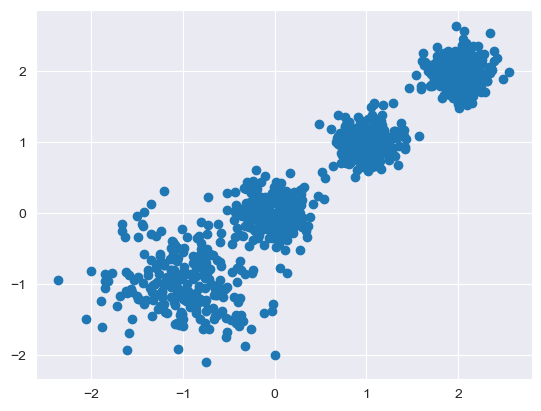

In [8]:
x, y = make_blobs(n_samples=1000, n_features=2, centers=[[-1, -1], [0, 0], [1, 1], [2, 2]],
                  cluster_std=[0.4, 0.2, 0.2, 0.2], random_state=22)
plt.scatter(x[:, 0], x[:, 1], marker="o")
plt.show()

D:\wym\tool\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\wym\tool\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


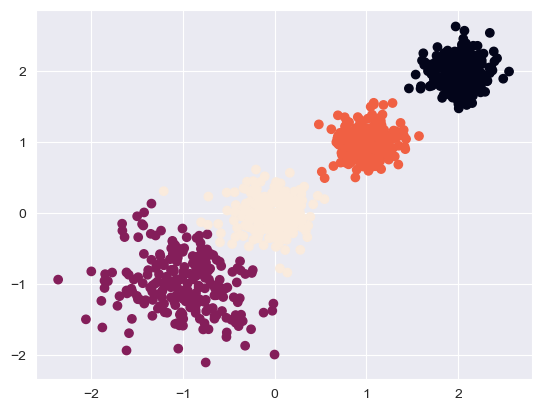

In [14]:
y_pre = KMeans(n_clusters=4, random_state=22).fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], marker="o", c=y_pre)

In [15]:
print(calinski_harabasz_score(x, y_pre))

5813.930875534541


特征降维
过滤方式:方差选择法：低方差特征过滤;相关系数法
算法自动特征选择：决策树：信息熵，信息增益；正则化:L1,L2;深度学习:卷积


过滤法 <br/>
sklearn.feature_selection.VarianceThreshold(threshold	=	0.0)<br/>
删除所有低⽅差特征<br/>
Variance.fit_transform(X)<br/>
X:numpy	array格式的数据[n_samples,n_features]<br/>
返回值：训练集差异低于threshold的特征将被删除。默认值是保留所有⾮零⽅差特征，即删除所有样本中<br/>
具有相同值的特征。

相关系数<br/>



In [16]:
#⽪尔逊相关系数法
from scipy.stats import pearsonr

x1 = [12.5, 15.3, 23.2, 26.4, 33.5, 34.4, 39.4, 45.2, 55.4, 60.9]
x2 = [21.2, 23.9, 32.9, 34.1, 42.5, 43.2, 49.0, 52.8, 59.4, 63.5]
pearsonr(x1, x2)
#斯⽪尔曼相关系
from scipy.stats import spearmanr

x1 = [12.5, 15.3, 23.2, 26.4, 33.5, 34.4, 39.4, 45.2, 55.4, 60.9]
x2 = [21.2, 23.9, 32.9, 34.1, 42.5, 43.2, 49.0, 52.8, 59.4, 63.5]
spearmanr(x1, x2)

#相关系数一般可按三级划分：|r|<0.4为低度相关；0.4≤|r|<0.7为显著性相关；0.7≤|r|<1为⾼度线性相关

PearsonRResult(statistic=0.9941983762371884, pvalue=4.922089955456965e-09)

In [ ]:
#主成分分析 是数据维数压缩，尽可能降低原数据的维数（复杂度），损失少量信息
#sklearn.decomposition.PCA(n_components=None)
#将数据分解为较低维数空间
#n_components:
#⼩数：表示保留百分之多少的信息
#整数：减少到多少特征
#PCA.fit_transform(X)	X:numpy	array格式的数据[n_samples,n_features]
#返回值：转换后指定维度的array

In [17]:
from sklearn.decomposition import PCA

data = [[2, 8, 4, 5], [6, 3, 0, 8], [5, 4, 9, 1]]
#	1、实例化PCA,	⼩数——保留多少信息
transfer = PCA(n_components=0.9)
#	2、调⽤fit_transform
data1 = transfer.fit_transform(data)
print("保留90%的信息，降维结果为：\n", data1)
#	1、实例化PCA,	整数——指定降维到的维数
transfer2 = PCA(n_components=3)
#	2、调⽤fit_transform
data2 = transfer2.fit_transform(data)
print("降维到3维的结果：\n", data2)

保留90%的信息，降维结果为：
 [[-3.13587302e-16  3.82970843e+00]
 [-5.74456265e+00 -1.91485422e+00]
 [ 5.74456265e+00 -1.91485422e+00]]
降维到3维的结果：
 [[-3.13587302e-16  3.82970843e+00  4.59544715e-16]
 [-5.74456265e+00 -1.91485422e+00  4.59544715e-16]
 [ 5.74456265e+00 -1.91485422e+00  4.59544715e-16]]
